In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('vuelos.csv')

In [3]:
df.head()

,fecha,hora_declarada,Ruta,operador,tipo_avion,total_abordo,pasajeros,tripulacion,total_fallecidos,pasajeros_fallecidos,tripulantes_fellecidos,fallecidos_tierra
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1.0,1.0,1,1,0.0,0.0
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,Wright Byplane,1,0.0,1.0,1,0,0.0,0.0
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5,0.0,5.0,5,0,5.0,0.0
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1,0.0,1.0,1,0,1.0,0.0
4,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),41,0.0,41.0,17,0,17.0,0.0


In [3]:
#se estrae el año de la columna fecha para poder graficar
df['año'] = pd.DatetimeIndex(df['fecha']).year

In [4]:
df['año'].to_csv('año.csv',index=False)

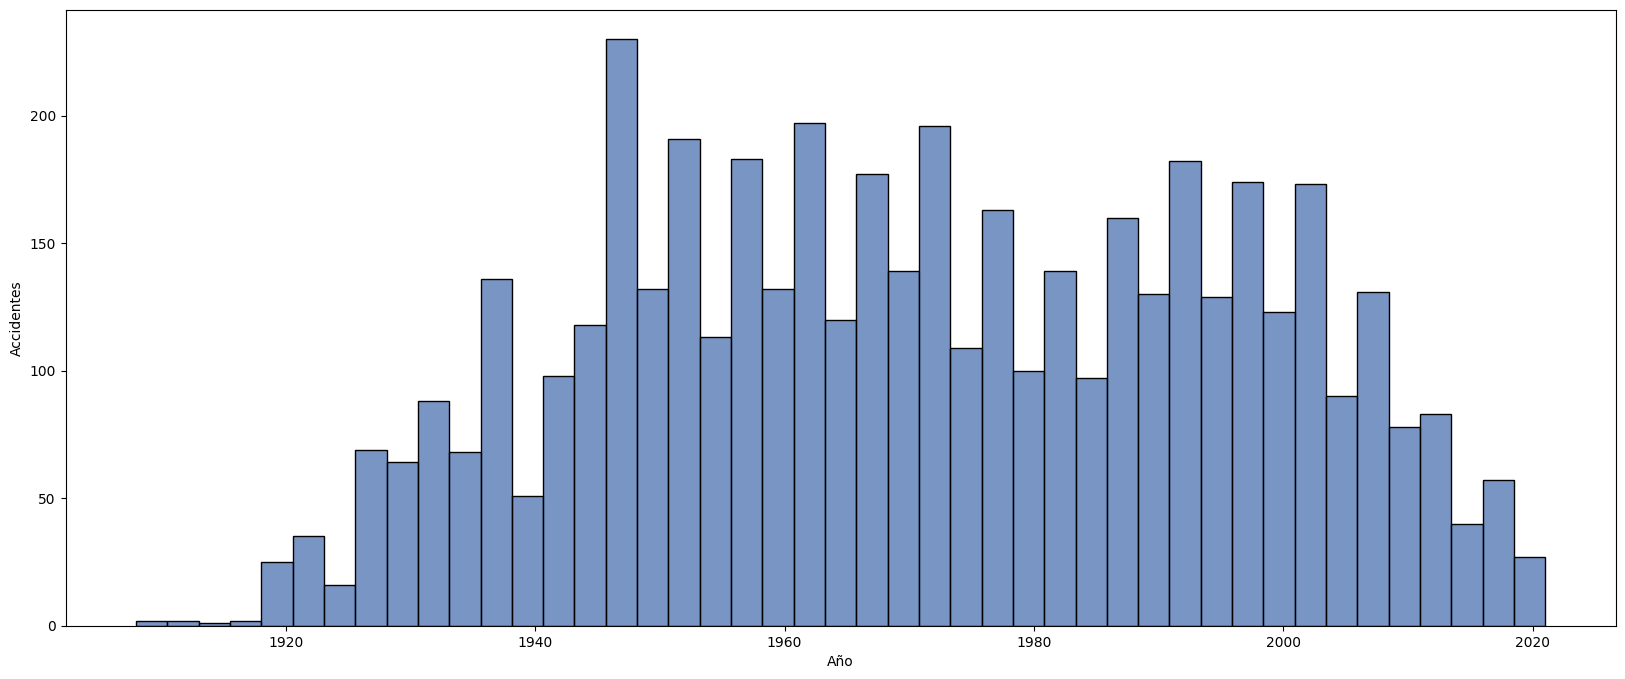

In [5]:
sns.set_palette('deep')
plt.figure(figsize=(20, 8))
sns.histplot(data=df, x='año', bins=45)
plt.xlabel('Año')
plt.ylabel('Accidentes')
plt.show()

En la grafica podemos ver que a partir de 1940 hay un aumento en el numero de accidentes, esto debido a que la aviacion comercial comenzo a partir de los 20's, aproximadamente siendo una de as primeras compañias de Avianca (barranquilla colombia) Y KML de los paises bajos (CNN. (2019, October 15). 10 oldest airlines in the world. Retrieved [22/05/2023], from https://www.cnn.com/travel/article/worlds-oldest-airlines/index.html). esto cobra mas sentido cuando vemos que entre los años 1939 y 1940 se declara la segunda guerra mundial, esto se ve reflejado en la grafica cuando vemos que hay una gran catidad de pruebas y vuelos  militares que se aprecia en el data set, gracias a los avances de la avicion debido a la guerra a mediados de los 50's se da un boom en la aviacion, esto hace que por estas fechas los vuelon se hagan mas populares (Newsweek. (n.d.). 50 formas en que los viajes aéreos han cambiado en los últimos 100 años. Recuperado el [22/05/2023], de https://www.newsweek.com/50-ways-air-travel-has-changed-over-last-100-years-1560111).

In [6]:
#se hara un top de los años con mas fallecidos. 
df_grouped = df.groupby('año')['total_fallecidos'].sum().reset_index()
#Ordenamos por el número total de fallecidos y seleccionamos los 10 primeros
top_10 = df_grouped.sort_values('total_fallecidos', ascending=False).head(10)
print(top_10)

     año  total_fallecidos
60  1972              2727
73  1985              2508
61  1973              2303
62  1974              2242
84  1996              2214
50  1962              2092
65  1977              2047
77  1989              1996
57  1969              1927
80  1992              1883


Se puede apreciar que el año 72 y 85 fueron los que mas accidentes tuvieron a lo largo de la historia. por lo tanto tratare de identificar alguna causa. 

In [7]:
# Filtramos los datos para el año 1972
df_1972 = df[df['año'] == 1972]
# Agrupamos por tipo de avión y contamos el número de accidentes
df_grouped = df_1972.groupby('tipo_avion')['tipo_avion'].count().reset_index(name='num_accidentes')

# Ordenamos por el número de accidentes
result = df_grouped.sort_values('num_accidentes', ascending=False)
print(result)

                      tipo_avion  num_accidentes
35    Fokker F-27 Friendship 200               3
43                Ilyushin IL-62               2
24                  Douglas DC-3               2
19                  Douglas C-47               2
52     McDonnell Douglas DC-9-32               2
..                           ...             ...
29                Douglas DC-7CF               1
30                 F-86 Sabrejet               1
31                Fairchild F-27               1
32     Fairchild-Hiller FH-227-B               1
68  de Havilland DH-114 Heron 2B               1

[69 rows x 2 columns]


In [8]:
df_grouped = df_1972.groupby('operador')['operador'].count().reset_index(name='num_accidentes')

# Ordenamos por el número de accidentes
result = df_grouped.sort_values('num_accidentes', ascending=False)
print(result)

                    operador  num_accidentes
2                   Aeroflot               5
5                Air America               3
1   Aero Transporti Italiani               2
35           Japan Air Lines               2
54                   Private               2
..                       ...             ...
28        Ethiopian Airlines               1
29               General Air               1
30        Helaire Helicopter               1
31           Iberia Airlines               1
65                      VASP               1

[66 rows x 2 columns]


Al parecer no hay ninguna que se pueda relacionar con el numero de accidente que hubieron en estos años, pero probablemente fue a causa de problemas tecnologicos y del mantenimiento de los aviones, puede que haya algunos otros factores de los cuales no se tiene información. 
podemos ver que la compañia con mas accidentes fue aeroflot para este año pór lo que vale la pena investigar mas a fondo el asunto.

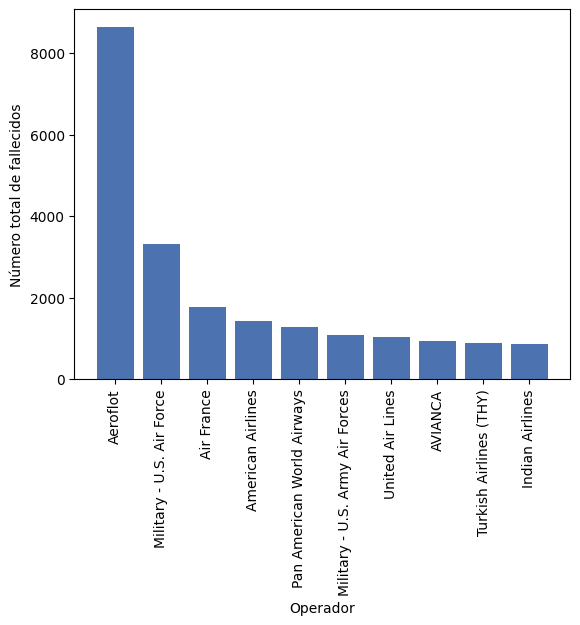

In [9]:

df_grouped = df.groupby('operador')['total_fallecidos'].sum().reset_index()

top_10 = df_grouped.sort_values('total_fallecidos', ascending=False).head(10)


plt.bar(top_10['operador'], top_10['total_fallecidos'])
plt.xticks(rotation=90)
plt.xlabel('Operador')
plt.ylabel('Número total de fallecidos')
plt.show()

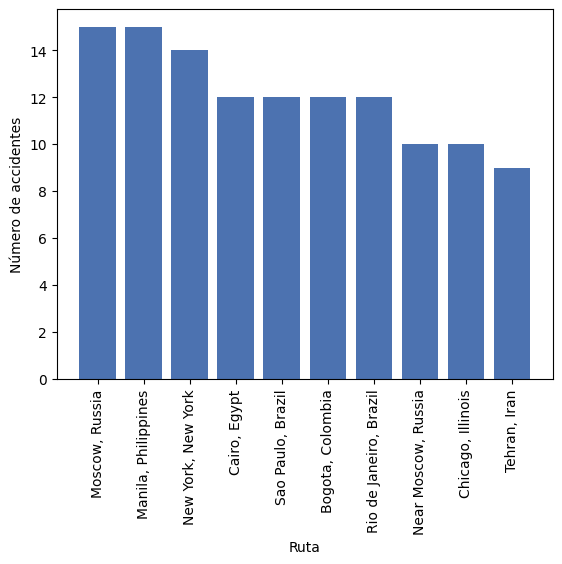

In [10]:
df_grouped = df.groupby('Ruta')['Ruta'].count().reset_index(name='num_accidentes')
top_10 = df_grouped.sort_values('num_accidentes', ascending=False).head(10)
plt.bar(top_10['Ruta'], top_10['num_accidentes'])
plt.xticks(rotation=90)
plt.xlabel('Ruta')
plt.ylabel('Número de accidentes')
plt.show()

como se puede apreciar en el grafico, aeroflot es la empresa con mas accidentes en toda tiene casi 4 veces mas accidentes que todas las demas compañias, posiblemente por el estado de la union sovietica la cual era poseedora de esta empresa en la decada de la guerra fria estaba tratando de ahorrar costos todo lo posible, lo concuerda con la ruta con más accidentes que fue la de Moscow, Russia la cual era propiedad de aeroflot.

Considerando la guerra seria un buen ejercicio ver los accidentes milatares que sucedieron durante la guerra mundial.

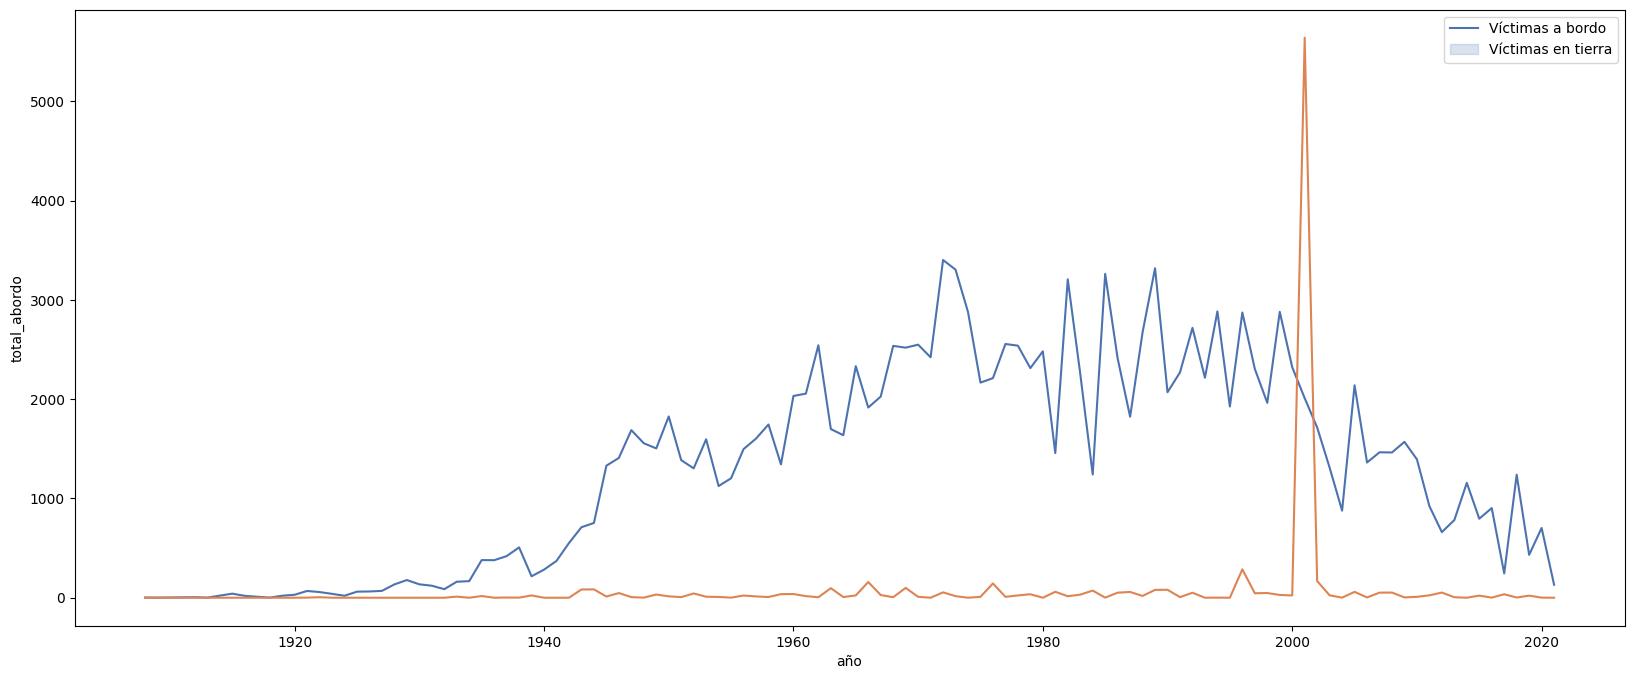

In [11]:
df_grouped = df.groupby('año').agg({'total_abordo': 'sum', 'fallecidos_tierra': 'sum'}).reset_index()
plt.figure(figsize=(20,8))
sns.lineplot(data=df_grouped, x='año', y='total_abordo')
sns.lineplot(data=df_grouped, x='año', y='fallecidos_tierra')
plt.legend(['Víctimas a bordo', 'Víctimas en tierra'])
plt.show()

al analizar las victimas en tierra y abordo del avion oidemos ver que los fallecidos en tierra por lo general son pocos, pero hay un dato atipico, este corresponde con las victimas que fueron parte del incidente en Estados Unidos en el año 2001 para el 11 de septiembre, este seria el unico dato rao que se aprecia en la grafica.